# Examen de Premio Inteligencia Artificial

 Curso 2024-2025

Nombre: Antonio Elias Sánchez Soto

El Breast Cancer Wisconsin (Diagnostic) Data Set contiene 569 muestras con 30 características numéricas que describen propiedades de los núcleos celulares extraídas de imágenes digitales de tumores mamarios. La variable objetivo (target) indica si el tumor es maligno (0) o benigno (1).

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

# Pregunta 1

a) Cargue el dataset muestre las primeras 5 filas de los datos (convertidos a un DataFrame de pandas).

b) Describa las características principales del dataset (número de muestras, número de características, y la variable objetivo).

c) Mencione dos posibles problemas o aspectos a considerar en el dataset que podrían requerir preprocesamiento y explique por qué son importantes para garantizar un buen desempeño del modelo.


In [133]:
#a)carga del dataset
from ucimlrepo import fetch_ucirepo 
import pandas as pd

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

df = pd.concat([X, y], axis=1)
df.head(5)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [135]:
df.value_counts(df["Diagnosis"]) #analisis de la variable objetivo

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [136]:
df["Diagnosis"] = df["Diagnosis"].map({"M":0, "B":1})#Label Encoding sobre la variable objetivo
df.value_counts(df["Diagnosis"])

Diagnosis
1    357
0    212
Name: count, dtype: int64

In [137]:
df.isnull().sum() #no hay valores nulos

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

In [138]:
df.duplicated().sum() #no hay duplicados

np.int64(0)

b) Se tienen 31 características para 569 muestras. De estas características 29 son de tipo float64, es decir, numéricas y una de tipo objeto (categórica y binaria). Esta variable categórica es la variable objetivo, hace referencia al diagnóstico del paciente (benigno o maligno).

c) En este dataset tenemos en primer lugar la necesidad de mapear, es decir, aplicar un Label Encoding sobre la variable objetivo para que el modelo pueda hacer predicciones más adecuadas. Todo modelo trabaja mucho mejor con características numéricas o booleanas que con valores categoriales.

Por otro lado, estandarizar el resto de características o normalizarlas ayudaría a no superponer el impacto de una sobre otra de forma incorrecta para la predicción de la variable objetivo.

# Pregunta 2
a) Realice la normalización de las 30 características del dataset. Muestre las primeras 5 filas del DataFrame escalado.

b) Aplique alguna técnica de reducción de dimensionalidad y genere un scatter plot de los datos transformados.

c) Explique brevemente cómo la normalización y la reducción de dimensionalidad contribuyen a mejorar la calidad del modelo en problemas de clasificación biomédica.

In [139]:
#a)Estandarización
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
numeric=df.drop(columns=["Diagnosis"])#la variable objetivo no es necesario estandarizarla ya que será 0 o 1, valores discretos
numericScaler=scaler.fit_transform(numeric)
data=pd.DataFrame(numericScaler,columns=numeric.columns)
data.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,2.372638e-16,-1.123881e-16,-1.123881e-16,-1.311195e-16,-1.529727e-16,1.748260e-16,1.623384e-16,0.000000,8.741299e-17,-6.243785e-18,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,-1.059924e+00,-1.554264e+00,-1.044049e+00,-7.378291e-01,-1.776065e+00,-1.298098e+00,-1.057501e+00,-1.913447,-1.532890e+00,-1.096968e+00,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,-6.235706e-01,-6.948092e-01,-6.237679e-01,-4.947542e-01,-6.240183e-01,-6.929263e-01,-5.571612e-01,-0.674490,-6.516807e-01,-5.851185e-01,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,-2.922452e-01,-1.974976e-01,-2.866520e-01,-3.477828e-01,-2.203352e-01,-2.810204e-01,-1.990654e-01,-0.140496,-2.194304e-01,-2.299405e-01,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,2.660996e-01,4.665523e-01,2.430307e-01,1.067726e-01,3.683553e-01,3.896541e-01,3.367521e-01,0.472657,3.556925e-01,2.886421e-01,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,8.906909e+00,6.655279e+00,9.461986e+00,1.104184e+01,8.029999e+00,6.143482e+00,1.207268e+01,6.649601,7.071917e+00,9.851593e+00,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [140]:
df = pd.concat([data, df["Diagnosis"]],axis=1) #concatenamos la tabla estandarizada con la columna de Diagnosis
df.head(5)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


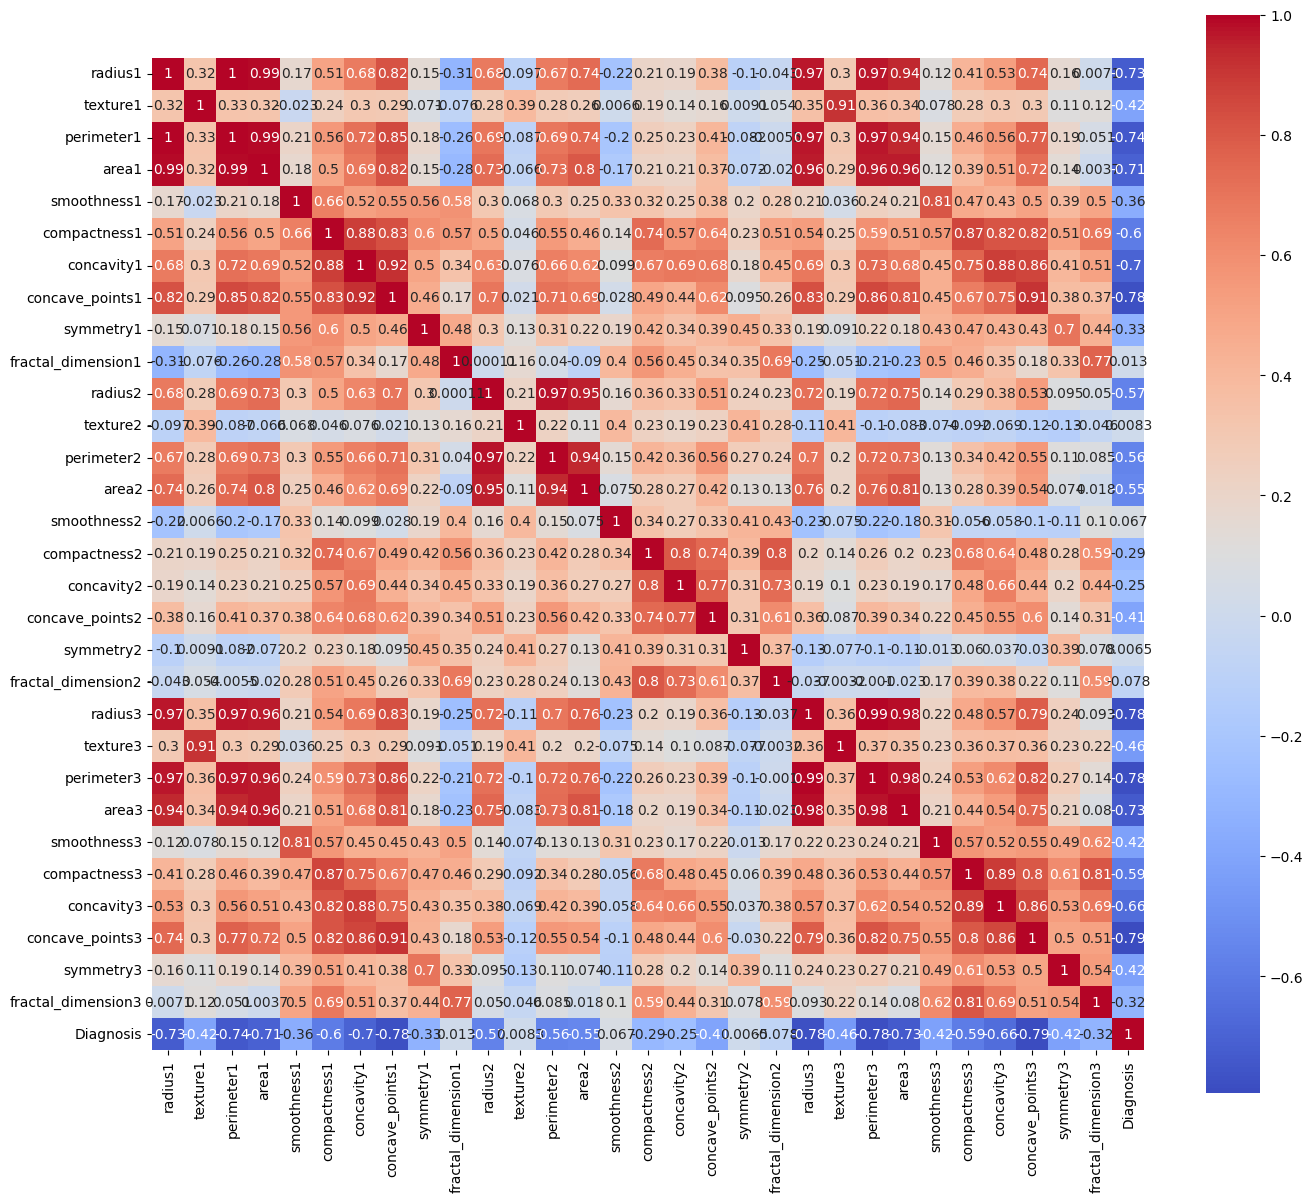

In [141]:
#b) antes de reducir la dimension de las caracteristicas visualizaremos la correlacion existente
import seaborn as sns 
import matplotlib.pyplot as plt 

correlation = df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.show()

In [142]:
#parece que la reducción de dimensionalidad mediante correlacion puede ser adecuado
correlationTarget=abs(correlation['Diagnosis'])
relevantFeatures=correlationTarget[correlationTarget>0.75]
print("Atributos relevantes basados en la correlación con Diagnosis:")
print(relevantFeatures)
selectedFeatures=set(relevantFeatures.index)
#al contrastar con el mapa de calor se nota que los valores con mayor correlación son inversamente proporcionales a la Diagnosis

Atributos relevantes basados en la correlación con Diagnosis:
concave_points1    0.776614
radius3            0.776454
perimeter3         0.782914
concave_points3    0.793566
Diagnosis          1.000000
Name: Diagnosis, dtype: float64


<Axes: xlabel='concave_points1', ylabel='radius3'>

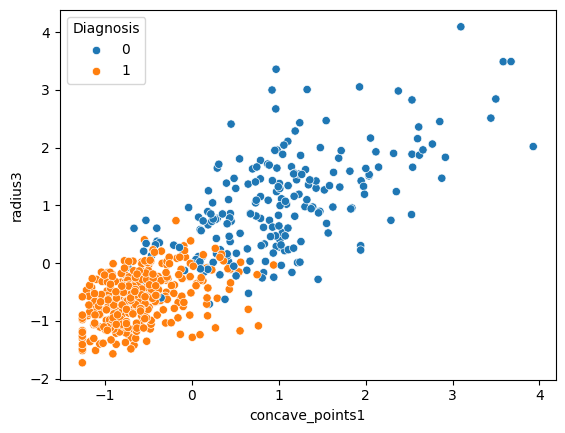

In [143]:
#algunos gráficos de dispersión sobre los atributos con más impacto para la Diagnosis
#se debe reflejar que los casos benignos son aquellos con valores más bajos de las características seleccionadas
sns.scatterplot(data=df,x="concave_points1", y="radius3", hue="Diagnosis")

<Axes: xlabel='perimeter3', ylabel='concave_points3'>

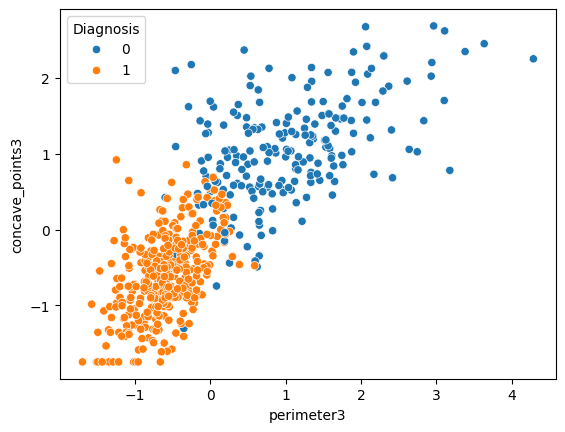

In [144]:
sns.scatterplot(data=df,x="perimeter3", y="concave_points3", hue="Diagnosis")

c) Importancia en problemas Biomédicos:
- La reducción de dimensionalidad permite optimizar la velocidad y estimación del modelo, pues, basta con reconocer el conjunto de características con mayor influencia sobre la variable objetivo. Los dataset de este tipo de problemas suelen contener un gran conjunto de características, por lo que analizar y decidir aquellas que realmente influyen sobre la predicción es algo muy adecuado. También hace que se encuentre alguna especie de marcadores biológicos o clínicos sobre la clasificación o regresión a realizar.
- La normalización permite ajustar los datos (principalmente datos numéricos) de forma que los valores de mayor proporción no afecten a la predicción, pues todas las características no poseen el mismo rango de valores y eso se debe tener en cuenta. Con técnicas como la estandarización se puede resolver esta problemática y ajustar el conjunto de valores de forma que las predicciones sean correctas.

# Pregunta 3

a) Divida el dataset en un conjunto de entrenamiento (80%) y prueba (20%). Entrene un modelo de clasificación (por ejemplo, regresión logística, KNN, SVM, Random Forest, etc.) para predecir la variable objetivo. Incluya el código para generar el modelo y ajuste los parámetros básicos que considere necesarios para mejorar el desempeño inicial.

b) Genere y visualice la matriz de confusión a partir de las predicciones obtenidas en el conjunto de prueba.

c) Explique la importancia de dividir el dataset en conjuntos de entrenamiento y prueba, y cómo esta división permite evaluar la capacidad de generalización del modelo, evitando el sobreajuste y proporcionando una estimación realista de su desempeño en datos no vistos.


In [145]:
#a Un modelo de clasificación como Decision Tree parece adecuado para el problema
selectedDF=df[list(selectedFeatures)+['Diagnosis']] #usar solo las caracteristicas seleccionadas y la variable objetivo

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selectedDF.drop('Diagnosis', axis=1), selectedDF['Diagnosis'], test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth=3, random_state=42)#no es mucha data, probare con una profundidad de 3
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [146]:
#b
from sklearn.metrics import classification_report

y_pred_prob = arbol.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print('\nReporte de Clasificación:')
print(classification_report(y_test, y_pred))
#este reporte aporta los resultados de la matriz de precision y otros, resulta que es un modelo bastante bueno para la problematica


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.93      0.97      0.95        71

   micro avg       0.93      0.97      0.95       142
   macro avg       0.93      0.97      0.95       142
weighted avg       0.93      0.97      0.95       142
 samples avg       0.61      0.61      0.61       142



d:\Coding\Laboratorios IA\entorno\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Coding\Laboratorios IA\entorno\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Coding\Laboratorios IA\entorno\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c) Dividir el dataset en conjuntos de entrenamiento y prueba permite que en una primera instancia que se entrene con el primer subconjunto, encuentre los patrones y ajuste los parámetros para que la clasificación sea lo más adecuada posible. Por otro lado, el conjunto de datos de prueba se emplea para verificar la precisión de las clasificaciones, y evaluar al modelo en cuán adecuado es para la problemática.

El tener dos subconjuntos con datos distintos también enfrenta al modelo ante situaciones similares pero no iguales, es decir, el modelo no tendrá un sobreajuste ya que no fue entrenado con los mismos datos con lo que se prueba. Lograr que el modelo no se sobreajuste es entonces obtener estimaciones más realistas.